# Class 14 – Linear Regression
**Objective:** Understand Linear Regression concepts and implement both Simple and Multiple Linear Regression using scikit-learn. Evaluate models using R² and Mean Squared Error (MSE).

## Introduction to Linear Regression
**Linear Regression** is a method to predict continuous values. For example, predicting a house price based on its size.

- **Simple Linear Regression**: Uses one independent variable.
- **Multiple Linear Regression**: Uses more than one independent variable.

### Assumptions:
- **Linearity**: The relationship between X and y is linear.
- **Independence**: Errors are independent.

### Model Evaluation Metrics:
- **R² Score** measures how well the model explains the variability of the output:
  $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$
- **MSE** is the average squared difference between actual and predicted:
  $$ MSE = \frac{1}{n} \sum (y_i - \hat{y}_i)^2 $$

## Part 1: Simple Linear Regression

**Step-by-Step:** We will predict house prices based on the size of the house (only one feature).

**Real-life analogy:** Like trying to predict a student’s score based on the number of hours studied.

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

**Explanation:** We import the required libraries:
- `pandas` and `numpy` for data handling
- `train_test_split` to divide the data
- `LinearRegression` to create the model
- `mean_squared_error` and `r2_score` to evaluate the model
- `matplotlib.pyplot` for visualizing the results

In [2]:
# Step 2: Load Dataset
data = pd.read_csv('house_prices.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,N,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,N,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,N,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,N,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,N,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Explanation:** We load the dataset which includes house size and price. This data helps us learn the relationship between size and price.

In [3]:
# Step 3: Preprocess Data (handling missing values)
data.shape

(21613, 21)

In [4]:
data.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


**Explanation:** We remove any rows where 'Size' or 'Price' is missing to ensure our model trains on complete data.

In [5]:
# Step 4: Select Features and Labels
X = data[['sqft_living']]  # Independent variable
y = data['price']   # Dependent variable

**Explanation:** `X` contains the feature we use to predict, and `y` is what we want to predict (Price).

In [6]:
# Step 5: Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Explanation:** We split the data into 80% training and 20% testing so we can check how well the model performs on unseen data.

In [7]:
# Step 6: Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Explanation:** We create and train the model using the training dataset.

In [8]:
# Step 7: Predict Values
y_pred = model.predict(X_test)

In [9]:
# Step 8: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R²: {r2:.2f}')

Mean Squared Error: 76484977061.78
R²: 0.49


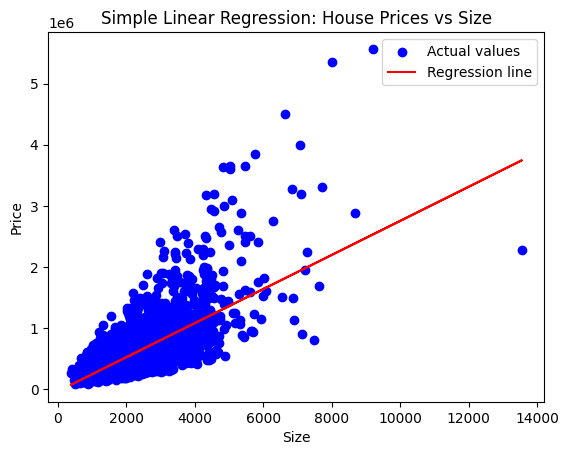

In [10]:
# Step 9: Visualize the Results
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Simple Linear Regression: House Prices vs Size')
plt.legend()
plt.show()

In [11]:
# Example: Predict price of house with 1800 sqft living area
example_sqft = pd.DataFrame({'sqft_living': [1800]})
predicted_price_sqft = model.predict(example_sqft)
print(f"Predicted price for a house with 1800 sqft: ${predicted_price_sqft[0]:,.2f}")


Predicted price for a house with 1800 sqft: $461,199.42


## Part 2: Multiple Linear Regression
**Objective:** Use multiple features to predict house prices (e.g., Size, Bedrooms).

**Real-life analogy:** Predicting salary based on experience, education, and skills together.

In [12]:
# Load Dataset Again (if needed)
data = pd.read_csv('house_prices.csv')
data = data.dropna(subset=['sqft_living', 'bedrooms', 'price'])

In [13]:
# Select Multiple Features
X = data[['sqft_living', 'bedrooms']]
y = data['price']

In [14]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train the Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predict and Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R²: {r2:.2f}')

Mean Squared Error: 74174783292.51
R²: 0.51


In [17]:
# Example: Predict price of house with 3 bedrooms and 1800 sqft living area
example_input = pd.DataFrame({'sqft_living': [1800], 'bedrooms': [3]})
predicted_price = model.predict(example_input)
print(f"Predicted price for a 3-bedroom house with 1800 sqft: ${predicted_price[0]:,.2f}")

Predicted price for a 3-bedroom house with 1800 sqft: $472,601.22


### Example code

In [19]:
# Step 1 : import library
import pandas as pd
# Step 2 : import data
salary = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')

In [20]:
salary.columns

Index(['Experience Years', 'Salary'], dtype='object')

In [21]:
# Step 3 : define target (y) and features (X)
y = salary['Salary']
X = salary[['Experience Years']]

In [22]:
# Step 4 : train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2529)

In [23]:
# check shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28, 1), (12, 1), (28,), (12,))

In [24]:
# Step 5 : select model
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [26]:
# Step 6 : train or fit model
model.fit(X_train,y_train)

LinearRegression()

In [27]:
# Step 7 : predict model
y_pred = model.predict(X_test)
y_pred


array([ 90555.15441095,  59516.61952424, 106544.70268592,  64219.42784041,
        68922.23615658, 123474.81262412,  84911.78443155,  63278.86617718,
        65159.98950364,  61397.74285071,  37883.70126987,  50111.00289191])

In [29]:
# Step 8 : model accuracy
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
mean_absolute_error(y_test,y_pred)
mean_absolute_percentage_error(y_test,y_pred)
mean_squared_error(y_test,y_pred)


24141421.671440993

In [30]:
# Step 9 : Predict salary for new data

# Predict salary for a person with 5 years of experience
new_experience = pd.DataFrame({'Experience Years': [5]})
predicted_salary = model.predict(new_experience)

print(f"Predicted salary for 5 years of experience: ${predicted_salary[0]:,.2f}")


Predicted salary for 5 years of experience: $73,625.04


In [32]:
# Step 9 : Predict salary using user input

# Ask user to input experience
experience_input = float(input("Enter years of experience: "))

# Create a DataFrame from user input
user_input_df = pd.DataFrame({'Experience Years': [experience_input]})

# Predict using trained model
predicted_salary_user = model.predict(user_input_df)

print(f"Predicted salary for {experience_input} years of experience: ${predicted_salary_user[0]:,.2f}")


Enter years of experience: 10
Predicted salary for 10.0 years of experience: $120,653.13


## Wrap-Up and Homework
- We learned about Simple and Multiple Linear Regression.
- We used evaluation metrics like R² and MSE.

**Homework:**
- Try using a different dataset like predicting salary using years of experience.
- Add more features and see how the performance changes.
- Experiment with plotting residual errors to check the linearity assumption.